## Import Libraries

In [38]:
import numpy as np
import pandas as pd
from keras import Model
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, Callback
from keras.layers import Conv2D, Reshape
from keras.utils import Sequence
from keras.backend import epsilon
import tensorflow as tf
import tqdm

from PIL import Image

import os
import random

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
import cv2


import warnings
warnings.filterwarnings('ignore')
np.random.seed(1)




from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense ,Flatten ,Conv2D ,MaxPooling2D ,Dropout ,BatchNormalization 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.callbacks import EarlyStopping ,ReduceLROnPlateau ,ModelCheckpoint

### Reading the training data 

In [2]:
train = pd.read_csv(r"C:\Users\Owner\Downloads\Racoon Detection\train_labels_.csv")


In [3]:
train.head()

filename  width  height    class  xmin  ymin  xmax  ymax
0  raccoon-17.jpg    259     194  raccoon    95    60   167   118
1  raccoon-11.jpg    660     432  raccoon     3     1   461   431
2  raccoon-63.jpg    600     400  raccoon    74   107   280   290
3  raccoon-63.jpg    600     400  raccoon   227    93   403   298
4  raccoon-60.jpg    273     185  raccoon    58    33   197   127

In [4]:
train.shape

(173, 8)

In [5]:
IMAGE_SIZE = 128

* Create an array 'coords' which has the resized coordinates of the bounding box for the training images

In [6]:
coords=train[["width","height","xmin","ymin","xmax","ymax"]]

coords["xmin"] = coords["xmin"] *IMAGE_SIZE/coords["width"]
coords["xmax"] = coords["xmax"]*IMAGE_SIZE /coords["width"]
coords["ymin"] = coords["ymin"] *IMAGE_SIZE/coords["height"]
coords["ymax"] = coords["ymax"] *IMAGE_SIZE/coords["height"]

coords.drop(["width","height"],axis =1,inplace=True)
coords.head()

xmin       ymin       xmax        ymax
0  46.949807  39.587629  82.532819   77.855670
1   0.581818   0.296296  89.406061  127.703704
2  15.786667  34.240000  59.733333   92.800000
3  48.426667  29.760000  85.973333   95.360000
4  27.194139  22.832432  92.366300   87.870270

* Create a list variable known as 'path' which has all the path for all the training images


In [7]:
paths = train["filename"]
len(paths)

173

### Processing Image

In [19]:
trainpath = r"C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/"
new_size=128    
X_train = []
y_train = []

for path in tqdm.tqdm(train['filename'].values[:161]):
    orignal_image = cv2.imread(trainpath+path)
    print(trainpath+path)
    image = cv2.cvtColor(orignal_image, cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(image , (new_size,new_size))
    X_train.append(resized_image)
print('image reading ...finished')
print('--------------------------------------------------')        


  9%|███████                                                                          | 14/161 [00:00<00:02, 72.09it/s]

C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-17.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-11.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-63.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-63.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-60.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-69.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-180.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-200.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-141.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-19.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-84.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-124.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/imag

 14%|███████████▌                                                                     | 23/161 [00:00<00:02, 62.50it/s]

C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-93.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-20.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-42.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-139.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-58.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-71.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-183.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-1.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-169.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-82.jpg


 24%|███████████████████▌                                                             | 39/161 [00:00<00:01, 71.15it/s]

C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-4.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-101.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-10.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-166.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-184.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-38.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-120.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-142.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-149.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-51.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-43.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-123.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/im

 37%|██████████████████████████████▏                                                  | 60/161 [00:00<00:01, 88.55it/s]

C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-47.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-167.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-54.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-77.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-155.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-89.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-153.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-179.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-115.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-64.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-56.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-44.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/ima

 43%|███████████████████████████████████▏                                             | 70/161 [00:00<00:01, 89.55it/s]

C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-193.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-138.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-157.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-108.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-116.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-117.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-117.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-12.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-12.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-16.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-90.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-160.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/

 56%|█████████████████████████████████████████████▎                                   | 90/161 [00:01<00:00, 87.74it/s]

C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-49.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-86.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-34.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-196.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-96.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-3.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-2.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-52.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-81.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-112.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-18.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-94.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/r

 70%|████████████████████████████████████████████████████████▏                       | 113/161 [00:01<00:00, 98.36it/s]

C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-55.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-175.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-163.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-48.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-70.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-119.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-119.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-119.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-88.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-61.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-61.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-121.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/im

 85%|███████████████████████████████████████████████████████████████████▏           | 137/161 [00:01<00:00, 100.13it/s]

C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-50.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-37.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-161.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-194.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-32.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-15.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-147.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-151.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-80.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-6.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-154.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-135.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/ima

 92%|█████████████████████████████████████████████████████████████████████████▌      | 148/161 [00:01<00:00, 96.50it/s]

C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-130.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-7.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-107.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-173.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-165.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-25.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-67.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-13.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-191.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-45.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-31.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-31.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/imag

100%|████████████████████████████████████████████████████████████████████████████████| 161/161 [00:01<00:00, 88.14it/s]

C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-136.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-114.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-76.jpg
C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-104.jpg
image reading ...finished
--------------------------------------------------


In [20]:
X_train=np.array(X_train)


In [21]:
X_train = X_train / 255.0

In [22]:
X_train.shape

(161, 128, 128, 3)

Current Working Directory: C:\Users\Owner\Guided Project\Racoon Detection


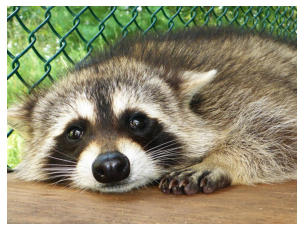

In [24]:
import matplotlib.pyplot as plt
import os
print("Current Working Directory:", os.getcwd())

img = plt.imread(r"C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-20.jpg")

plt.imshow(img)
plt.axis('off')  
plt.show()

### Visualizing images with Bounding Boxes

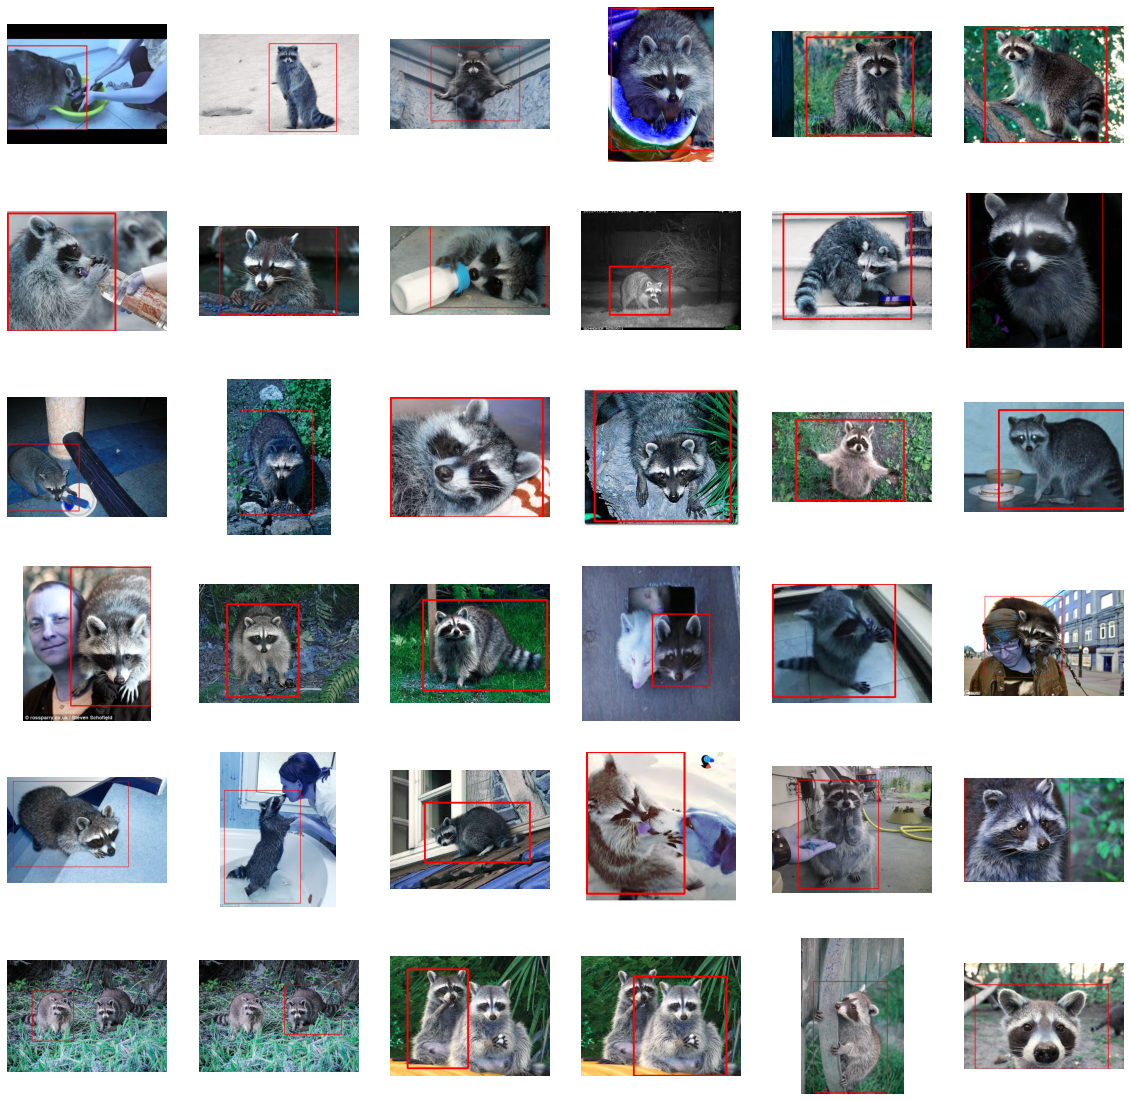

In [25]:
plt.figure(figsize=(20,20))
for n , i in enumerate(range(36,72)) : 
    plt.subplot(6,6,n+1)
    img = cv2.imread(trainpath+str(train.iloc[i,0]))
    img=cv2.rectangle(img,(train['xmin'][i],train['ymin'][i]), (train['xmax'][i],train['ymax'][i]) , (255,0,0),2)
    plt.imshow(img)   
    plt.axis('off')
    


In [31]:
train["filename"].values[161:]

array(['raccoon-109.jpg', 'raccoon-87.jpg', 'raccoon-113.jpg',
       'raccoon-78.jpg', 'raccoon-65.jpg', 'raccoon-122.jpg',
       'raccoon-73.jpg', 'raccoon-137.jpg', 'raccoon-171.jpg',
       'raccoon-190.jpg', 'raccoon-22.jpg', 'raccoon-152.jpg'],
      dtype=object)

In [33]:
 
testpath = r"C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/"
new_size=128    
X_test = []
y_test = []

for path in tqdm.tqdm(train['filename'].values[161:]): 
    orignal_image = cv2.imread(testpath+path)
    image = cv2.cvtColor(orignal_image, cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(image , (new_size,new_size))
    X_test.append(resized_image)
    
X_test = np.array(X_test)
X_test = X_test / 255.0
print('image reading ...finished')

100%|█████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 102.38it/s]

image reading ...finished


### Adjusting Bounding Box Coordinates

In [34]:
train=train[["width","height","xmin","ymin","xmax","ymax"]]

train["xmin"] = train["xmin"] *new_size/train["width"]
train["xmax"] = train["xmax"]*new_size /train["width"]
train["ymin"] = train["ymin"] *new_size/train["height"]
train["ymax"] = train["ymax"] *new_size/train["height"]

In [35]:
train.drop(['width','height'],axis=1,inplace=True)
train.head()

xmin       ymin       xmax        ymax
0  46.949807  39.587629  82.532819   77.855670
1   0.581818   0.296296  89.406061  127.703704
2  15.786667  34.240000  59.733333   92.800000
3  48.426667  29.760000  85.973333   95.360000
4  27.194139  22.832432  92.366300   87.870270

In [37]:
y_train=train.iloc[:161,:]
y_test=train.iloc[161:,:]

### Calculate IOU metric

In [39]:
from tensorflow.keras.backend import epsilon
def loss(gt,pred):
    intersections = 0
    unions = 0
    diff_width = np.minimum(gt[:,0] + gt[:,2], pred[:,0] + pred[:,2]) - np.maximum(gt[:,0], pred[:,0])
    diff_height = np.minimum(gt[:,1] + gt[:,3], pred[:,1] + pred[:,3]) - np.maximum(gt[:,1], pred[:,1])
    intersection = diff_width * diff_height
    
    
    area_gt = gt[:,2] * gt[:,3]
    area_pred = pred[:,2] * pred[:,3]
    union = area_gt + area_pred - intersection

    for j, _ in enumerate(union):
        if union[j] > 0 and intersection[j] > 0 and union[j] >= intersection[j]:
            intersections += intersection[j]
            unions += union[j]

    iou = np.round(intersections / (unions + epsilon()), 4)
    iou = iou.astype(np.float32)
    return iou

def IoU(y_true, y_pred):
    iou = tf.py_function(loss, [y_true, y_pred], tf.float32)
    return iou

### Setting up Callback and optimizer

In [40]:
#callbacks
EarlyStop=EarlyStopping(patience=5,monitor='val_iou',restore_best_weights=True)
Reduce_LR=ReduceLROnPlateau(monitor='val_iou',verbose=2,factor=0.5,min_lr=0.00001)
model_check=ModelCheckpoint('model.hdf5',monitor='val_iou',verbose=1,save_best_only=True)
callback=[EarlyStop , Reduce_LR,model_check]

#optimizer
optimizer_adam=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.99)

### Defining CNN Model

In [41]:
model=Sequential([
                    Conv2D(64,3,activation='relu',kernel_initializer='he_normal',input_shape=(new_size,new_size,3),kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
                    BatchNormalization(),
                    MaxPooling2D(3),
    
                    Conv2D(128,3,activation='relu',kernel_initializer='he_normal',kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
                    BatchNormalization(),
                    MaxPooling2D(3),
    
                    Conv2D(256,3,activation='relu',kernel_initializer='he_normal',kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
                    BatchNormalization(),
                    MaxPooling2D(3),
    
    
                    Flatten(),
                    Dense(128,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
                    Dense(32,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
                    Dense(4,activation='relu',kernel_initializer='glorot_normal')
                  
])



In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 42, 42, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 128)       73856     
                                                                 
 batch_normalization_1 (Batc  (None, 40, 40, 128)      512       
 hNormalization)                                                 
                                                        

### Compiling model

In [43]:
model.compile(optimizer=optimizer_adam, loss='mse', metrics=[IoU])

history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=4,
                  steps_per_epoch=len(X_train)//4,
                  callbacks=callback, verbose=1)

Epoch 1/200
40/40 [==============================] - 6s 112ms/step - loss: 1386.2484 - IoU: 0.3714 - val_loss: 2809.0505 - val_IoU: 0.0627 - lr: 0.0010
Epoch 2/200
40/40 [==============================] - 4s 112ms/step - loss: 479.2797 - IoU: 0.4794 - val_loss: 2356.7292 - val_IoU: 0.0857 - lr: 0.0010
Epoch 3/200
40/40 [==============================] - 4s 103ms/step - loss: 401.1043 - IoU: 0.5270 - val_loss: 1912.4506 - val_IoU: 0.1378 - lr: 0.0010
Epoch 4/200
40/40 [==============================] - 4s 103ms/step - loss: 388.7055 - IoU: 0.5270 - val_loss: 1359.2262 - val_IoU: 0.2125 - lr: 0.0010
Epoch 5/200
40/40 [==============================] - 4s 104ms/step - loss: 339.6056 - IoU: 0.5676 - val_loss: 676.1481 - val_IoU: 0.3498 - lr: 0.0010
Epoch 6/200
40/40 [==============================] - 4s 104ms/step - loss: 367.6217 - IoU: 0.5482 - val_loss: 923.3078 - val_IoU: 0.3251 - lr: 0.0010
Epoch 7/200
40/40 [==============================] - 4s 105ms/step - loss: 342.2529 - IoU: 0.57

### Plotting Training Values

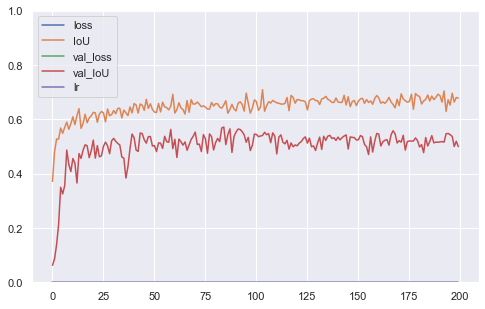

In [44]:
import seaborn as sns
sns.set()


pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

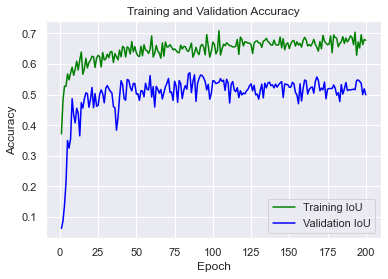

In [45]:

IoU = history.history['IoU']
val_IoU = history.history['val_IoU']
epochs = range(1, len(IoU) + 1)

#accuracy plot
plt.plot(epochs, IoU, color='green', label='Training IoU')
plt.plot(epochs, val_IoU, color='blue', label='Validation IoU')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Current Working Directory: C:\Users\Owner\Guided Project\Racoon Detection


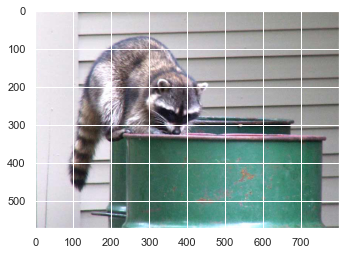

In [48]:
print("Current Working Directory:", os.getcwd())
img = plt.imread(r"C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-2.jpg")
plt.imshow(img)


In [49]:
image_height, image_width, _ = img.shape
image = cv2.resize(img,(new_size,new_size))
image = image / 255.0

In [50]:
image.shape

(128, 128, 3)

In [51]:
image=np.expand_dims(image,axis=0)
region = model.predict(image)[0]
region

1/1 [==============================] - 0s 150ms/step


array([11.15127 ,  0.      , 65.702965, 98.6311  ], dtype=float32)

In [52]:
x0 = int(region[0] * image_width / new_size) 
y0 = int(region[1] * image_height / new_size)
x1 = int((region[2]) * image_width / new_size)
y1 = int((region[3]) * image_height / new_size)

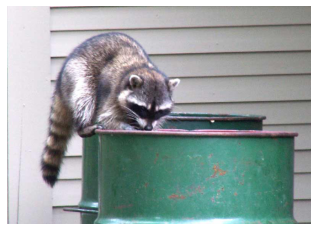

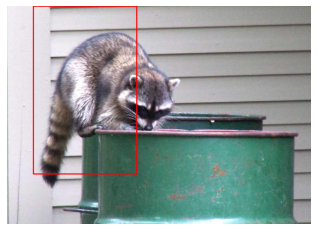

In [54]:
img=plt.imread(r"C:/Users/Owner/Downloads/Racoon Detection/Racoon Images/images/raccoon-2.jpg")
plt.imshow(img)
plt.axis('off')
plt.show()
cv2.rectangle(img,(x0, y0), ((x1 - x0) , (y1 - y0)) , (255,0,0),2)

plt.imshow(img)
plt.axis('off')
plt.show()

### Visualizing the predictions

1/1 [==============================] - 0s 23ms/step


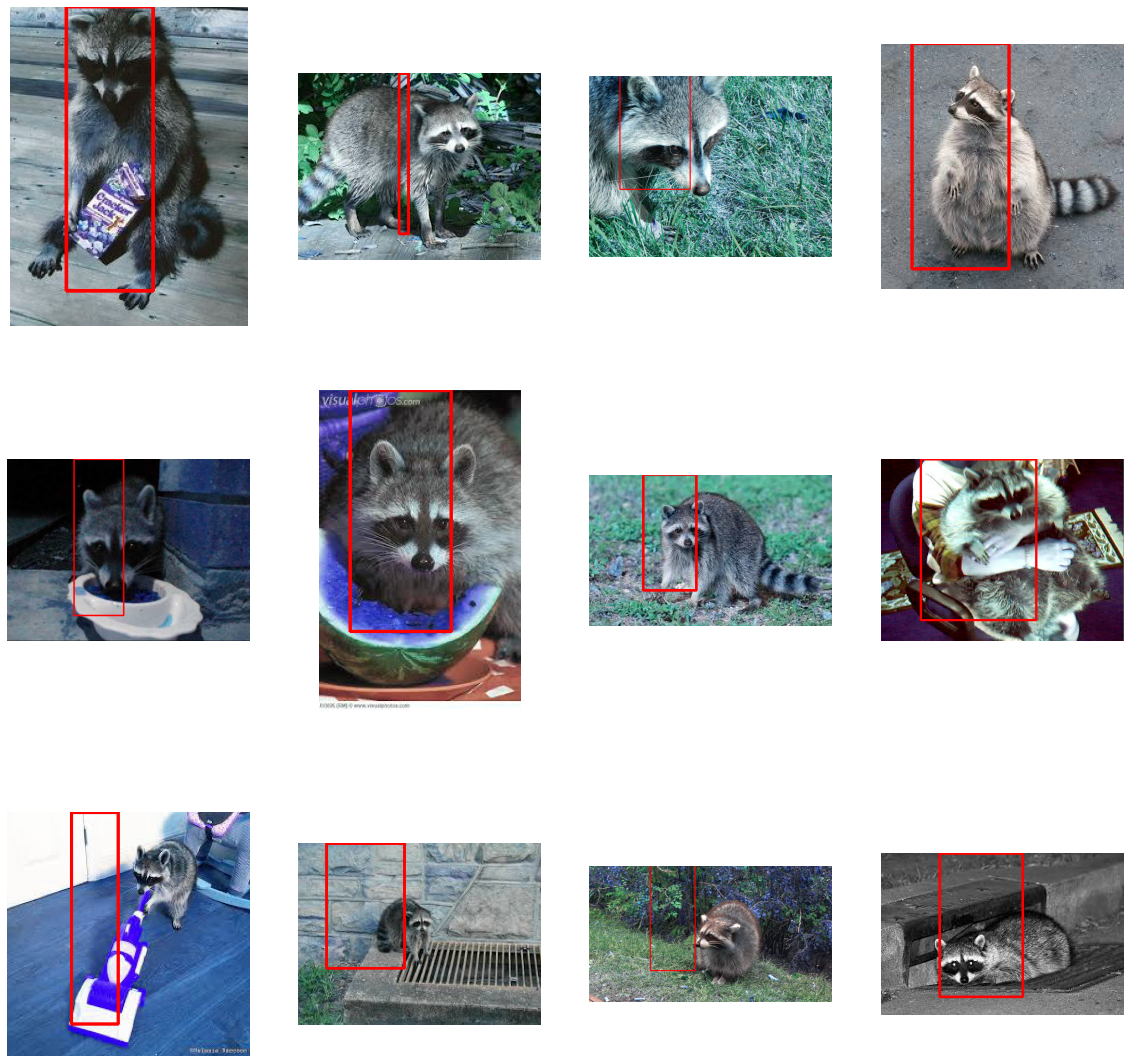

In [56]:
df=pd.read_csv(r"C:\Users\Owner\Downloads\Racoon Detection\train_labels_.csv")[161:]
plt.figure(figsize=(20,20))
for n , i in enumerate(range(12)) : 
    plt.subplot(3,4,n+1)
    
    img = cv2.imread(trainpath+str(df.iloc[i,0]))
    org_img=img.copy()
    
    image_height, image_width, _ = img.shape
    
    
    img = cv2.resize(img,(new_size,new_size))
    img = img / 255.0
    img=np.expand_dims(img,axis=0)
    region = model.predict(img)[0]
    
    x0 = int(region[0] * image_width / new_size) 
    y0 = int(region[1] * image_height / new_size)
    x1 = int((region[2]) * image_width / new_size)
    y1 = int((region[3]) * image_height / new_size)
    
    cv2.rectangle(org_img,(x0, y0), ((x1 - x0) , (y1 - y0)) , (255,0,0),2)
    plt.imshow(org_img)   
    plt.axis('off')
    
